# **LA County Median Household Income**

## Jessica Melendez

The purpose of this notebook is to see if there are any differences among zip codes as compared to cities from the last notebook I did. I will also be focusing this dataset to be more accurate by looking at 2019 inflation adjusted median household income. 

Let's start with the libraries...

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

## Importing Updated Data
Again, this time we will be looking at data based on zip code versus name of city.

In [2]:
LA_income = gpd.read_file('data/LAincome.geojson')

Great! Now, how big is the data set?

In [3]:
LA_income.shape

(303, 5)

303 rows and 5 columns... okay, definitely more than the last data set we imported!

Let's get a sample of where it starts

In [4]:
LA_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,05000US06037,"Los Angeles County, CA",68044.0,347.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,86000US90001,90001,43360.0,2437.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620..."
2,86000US90002,90002,37285.0,1920.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651..."
3,86000US90003,90003,40598.0,1743.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826..."
4,86000US90004,90004,49675.0,1784.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381..."


I see it starts with the 90001 Zip Code... South Central represent! 90003- I organized there at Fremont High School not too long ago...

Okay, so what the end look like?

In [5]:
LA_income.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
298,86000US93552,93552,65728.0,2550.0,"MULTIPOLYGON (((-118.07917 34.51358, -118.0716..."
299,86000US93553,93553,51630.0,21791.0,"MULTIPOLYGON (((-118.01330 34.35839, -118.0132..."
300,86000US93560,93560,60743.0,7969.0,"MULTIPOLYGON (((-118.43128 34.88985, -118.4312..."
301,86000US93563,93563,NaN,NaN,"MULTIPOLYGON (((-117.87587 34.45627, -117.8756..."
302,86000US93591,93591,47453.0,3167.0,"MULTIPOLYGON (((-117.99174 34.66059, -117.9915..."


Looks like the Lancaster/Palmdale area

let's look at a random sample now.

In [6]:
LA_income.sample()

,geoid,name,B19013001,"B19013001, Error",geometry
204,86000US91321,91321,73187.0,5202.0,"MULTIPOLYGON (((-118.56958 34.38733, -118.5692..."


Santa Monica! We all know where that's at

## Let's get to plotting this table to begin visualizing this data!

<AxesSubplot:>

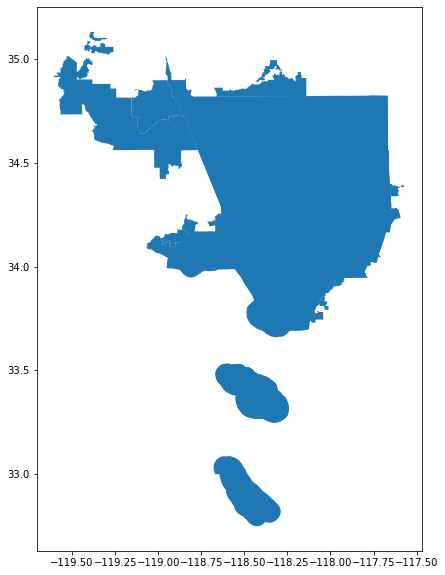

In [7]:
LA_income.plot(figsize=(10,10))

Nice! That looks great! Looks like it goes a little beyond just LA County too!

What data types are in this data set now?

In [8]:
LA_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             303 non-null    object  
 1   name              303 non-null    object  
 2   B19013001         288 non-null    float64 
 3   B19013001, Error  288 non-null    float64 
 4   geometry          303 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 12.0+ KB


Look at that summarized data set! Let's look at the FIPS code again since we might continue incorporating county data from the census.

In [9]:
LA_income.geoid.head()

0    05000US06037
1    86000US90001
2    86000US90002
3    86000US90003
4    86000US90004
Name: geoid, dtype: object

Again, this first row is for the entire county. We can do without it so let's drop the first row.

In [10]:
LA_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,05000US06037,"Los Angeles County, CA",68044.0,347.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,86000US90001,90001,43360.0,2437.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620..."
2,86000US90002,90002,37285.0,1920.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651..."
3,86000US90003,90003,40598.0,1743.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826..."
4,86000US90004,90004,49675.0,1784.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381..."


In [11]:
LA_income = LA_income.drop([0])

Okay, how does it look without it now

In [12]:
LA_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
1,86000US90001,90001,43360.0,2437.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620..."
2,86000US90002,90002,37285.0,1920.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651..."
3,86000US90003,90003,40598.0,1743.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826..."
4,86000US90004,90004,49675.0,1784.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381..."
5,86000US90005,90005,38491.0,2241.0,"MULTIPOLYGON (((-118.29291 34.06360, -118.2923..."


Awesome! Seems like we're on the right track.

## Let's see what else we can do with this census data!

For starters, let's look at the list of columns we're working with.

In [13]:
list(LA_income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

Interesting! Again, only 5 columns so I'm realizing we may not be able to do what I had hoped for and calculate percentages by zip code since they all fall within the zip code column rather than being separated in different columns individually. It's okay. Its still a new data set but within the research we aim to look at. Let's keep working...

Alright, let's sort through some of this data and keep only the columns we need.

In [14]:
columns_to_keep = ['geoid',
 'name',
 'B19013001',
 'geometry']

Toodaloo B19013001, Error! We're sticking with the median household income adjusted for inflation to keep our data more accurate.

In [15]:
LA_income = LA_income[columns_to_keep]

Okay, so what's that look like now?

In [16]:
LA_income.head()

,geoid,name,B19013001,geometry
1,86000US90001,90001,43360.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620..."
2,86000US90002,90002,37285.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651..."
3,86000US90003,90003,40598.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826..."
4,86000US90004,90004,49675.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381..."
5,86000US90005,90005,38491.0,"MULTIPOLYGON (((-118.29291 34.06360, -118.2923..."


Hmmm... better but who understands what B19013001, means?! Let's simplify and rename the column!

In [17]:
LA_income.columns = ['geoid',
 'zipcode',
 'mhhi_adj',
 'geometry']

Great! Let's see what that looks like as a table!

In [18]:
LA_income.head()

,geoid,zipcode,mhhi_adj,geometry
1,86000US90001,90001,43360.0,"MULTIPOLYGON (((-118.26519 33.98923, -118.2620..."
2,86000US90002,90002,37285.0,"MULTIPOLYGON (((-118.26516 33.94643, -118.2651..."
3,86000US90003,90003,40598.0,"MULTIPOLYGON (((-118.28320 33.98914, -118.2826..."
4,86000US90004,90004,49675.0,"MULTIPOLYGON (((-118.33858 34.08346, -118.3381..."
5,86000US90005,90005,38491.0,"MULTIPOLYGON (((-118.29291 34.06360, -118.2923..."


## Moving on!

Let's see what a single column's data looks like

In [19]:
LA_income['mhhi_adj'].head()

1    43360.0
2    37285.0
3    40598.0
4    49675.0
5    38491.0
Name: mhhi_adj, dtype: float64

Okay, great! Now, let's look at our data again, what is the mean for median household income adjusted for inflation?

In [20]:
LA_income['mhhi_adj'].mean()

77149.96864111499

Interesting! 77,149.97 is the mean median household income. I hope i can be making that some time soon! One can dream, right?

Now, what does the median for median household income look like?

In [21]:
LA_income['mhhi_adj'].median()

71691.0

So among our various zip codes, 71,691 is the median household income 

## Let's see those quant. skills again! Where are the stats at?!

In [22]:
LA_income['mhhi_adj'].describe()

count       287.000000
mean      77149.968641
std       30656.774414
min       21635.000000
25%       53896.500000
50%       71691.000000
75%       93281.500000
max      209531.000000
Name: mhhi_adj, dtype: float64

Wow! So at the very minimum across all the zip codes in this data set, the median household income for some areas is 21,635 while the maximum some areas report is 209,531. That's such a wide gap!

## Let's see what that looks like on a histogram!

<AxesSubplot:ylabel='Frequency'>

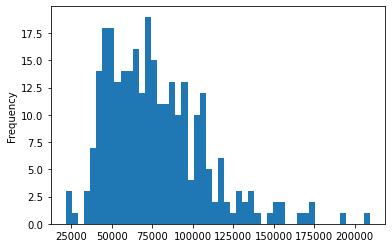

In [23]:
LA_income['mhhi_adj'].plot.hist(bins=50)

Let's see, the gap is still pretty wide between the minimum amount of median household income reported and the 25th percentile. However, the distance between the maximums median household income and the maximum median household income is significantly larger. 

Let's look at this data as it ascends upward.

In [24]:
LA_income_sorted = LA_income.sort_values(by='mhhi_adj',ascending = False)

What's that look like on the table?

In [25]:
LA_income_sorted[['geoid','mhhi_adj']].head(10)

,geoid,mhhi_adj
63,86000US90077,209531.0
94,86000US90272,192500.0
171,86000US91011,175652.0
238,86000US91436,174085.0
95,86000US90274,169919.0
185,86000US91108,165765.0
67,86000US90094,155417.0
110,86000US90402,154583.0
92,86000US90266,153023.0
91,86000US90265,152378.0


## Perfect! Let's see that plotted now!

<AxesSubplot:>

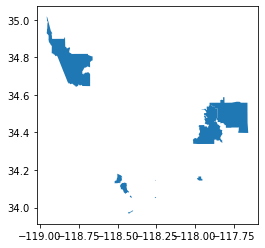

In [31]:
LA_income_sorted.head(10).plot()

Okay, seems like the corners of this data set seem to have the lowest median household income 

Let's visualize that now!

<AxesSubplot:>

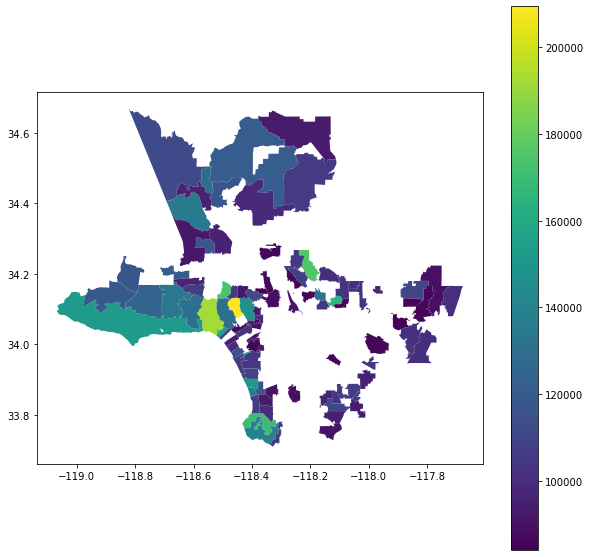

In [26]:
LA_income_sorted.head(100).plot(figsize=(10,10),column='mhhi_adj',legend=True)

Looks like those zip code closer to the coast and more central in this data set have some of the highest levels of median household income

## Let's plot that in percentiles!

Next time let's use another data set that might have more values in different columns that we can separate and compare

<AxesSubplot:>

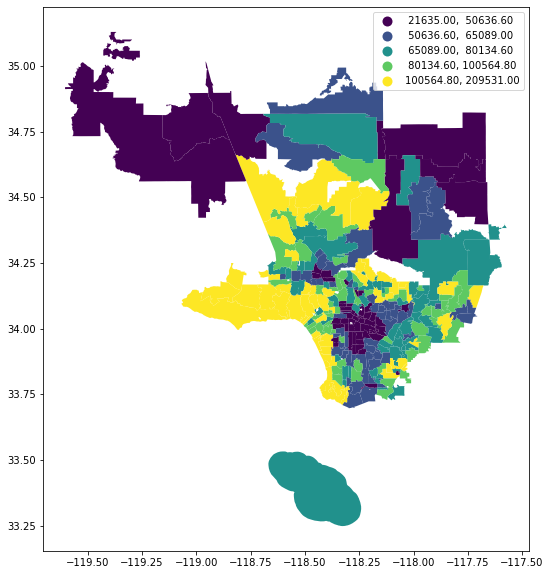

In [27]:
LA_income.plot(figsize=(12,10),
                 column='mhhi_adj',
                 legend=True, 
                 scheme='quantiles')

Look at that! Seems like the zip codes with the lowest amounts of median household income are concentrated in the center of the map and central to the region. However, there are also two other areas at the far corners that seem to have low amounts of median household income. Looking at this map, I want to see what other methods I can learn or data sets I can use that tell us exactly what zip codes correlate with the percentiles being visualized in this map.